# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


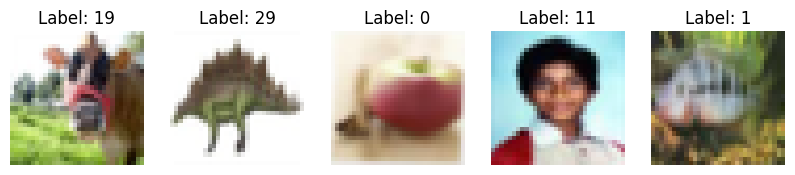

In [2]:
# Explore the datasets and show a few examples

import matplotlib.pyplot as plt

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Display a few example images with their labels
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i])
    ax.set_title(f"Label: {y_train[i][0]}")
    ax.axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape[0]}")
print(f"Validation set size: {x_val.shape[0]}")


Training set size: 40000
Validation set size: 10000


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')  # 100 classes
])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 368,420 (1.41 MB)

 Trainable params: 368,420 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> I chose categorical_crossentropy as the loss function since it is used for multi-class classification problems.
- <b>Optimizer:</b> Adam is chosen as the optimizer for its efficiency in handling large datasets and adaptive learning rate.

In [5]:
from keras import optimizers

from keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [6]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(x_val, y_val)
)


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 47ms/step - accuracy: 0.0514 - loss: 4.2797 - val_accuracy: 0.1480 - val_loss: 3.5835
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 54ms/step - accuracy: 0.1859 - loss: 3.3935 - val_accuracy: 0.2246 - val_loss: 3.1714
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.2625 - loss: 2.9901 - val_accuracy: 0.2720 - val_loss: 2.9518
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 47ms/step - accuracy: 0.3141 - loss: 2.7430 - val_accuracy: 0.2942 - val_loss: 2.8197
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.3520 - loss: 2.5482 - val_accuracy: 0.3233 - val_loss: 2.7089
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 89s 53ms/step - accuracy: 0.3841 - loss: 2.3806 - val_accuracy: 0.3221 - val_loss: 2.7373
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.4092 - loss: 2.2615 - val_accuracy: 0.3330 - val_loss: 2.7221
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 59s 47ms/step - accuracy: 0.4340 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 33.56%
- <b>Other metric:</b> F1 score
- <b>Reason for selection:</b> F1 score takes into account both precision (how many predicted classes are correct) and recall (how many identified classes are correct) which provides a clearer understanding of how well the model performs on both identifying true instances and minimizing false positives.
- <b>Value of metric:</b> 0.334 (33.4%)
- <b>Interpretation of metric value:</b> F1 score of 0.334 is a low score, meaning only about 1/3 of the instances are correctly classified. The model needs significant enhancement.

In [7]:
from sklearn.metrics import classification_report
import numpy as np

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate a classification report
report = classification_report(y_true, y_pred_classes, output_dict=True)
print(f"Accuracy: {test_acc}")
print(f"Precision, Recall, F1-Score (Macro): {report['macro avg']}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Accuracy: 0.33559998869895935
Precision, Recall, F1-Score (Macro): {'precision': 0.3509315043785078, 'recall': 0.3356, 'f1-score': 0.333960384242618, 'support': 10000.0}


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

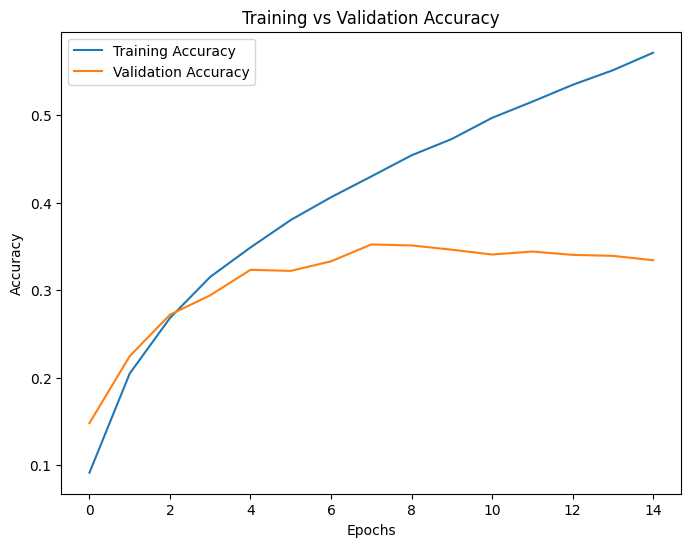

In [8]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


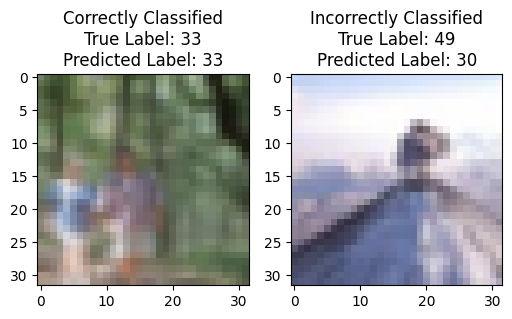


Correctly Classified - Prediction Probabilities:
Class 0: 0.0000
Class 1: 0.0004
Class 2: 0.0001
Class 3: 0.0030
Class 4: 0.0001
Class 5: 0.0000
Class 6: 0.0012
Class 7: 0.0001
Class 8: 0.0013
Class 9: 0.0001
Class 10: 0.0000
Class 11: 0.0001
Class 12: 0.0003
Class 13: 0.0000
Class 14: 0.0004
Class 15: 0.0002
Class 16: 0.0000
Class 17: 0.0000
Class 18: 0.0119
Class 19: 0.0009
Class 20: 0.0000
Class 21: 0.0001
Class 22: 0.0000
Class 23: 0.0000
Class 24: 0.0000
Class 25: 0.0000
Class 26: 0.0000
Class 27: 0.0008
Class 28: 0.0000
Class 29: 0.0013
Class 30: 0.0000
Class 31: 0.0092
Class 32: 0.0011
Class 33: 0.3833
Class 34: 0.0069
Class 35: 0.0000
Class 36: 0.0000
Class 37: 0.0002
Class 38: 0.0141
Class 39: 0.0000
Class 40: 0.0000
Class 41: 0.0000
Class 42: 0.1688
Class 43: 0.0006
Class 44: 0.0012
Class 45: 0.0049
Class 46: 0.0004
Class 47: 0.0004
Class 48: 0.0000
Class 49: 0.0000
Class 50: 0.0045
Class 51: 0.0035
Class 52: 0.0000
Class 53: 0.0000
Class 54: 0.0000
Class 55: 0.0034
Class 56

In [14]:
# Find correctly classified image
correct_idx = np.where(y_pred_classes == y_true)[0][0]  # First correct prediction
incorrect_idx = np.where(y_pred_classes != y_true)[0][0]  # First incorrect prediction

# Plot the correctly classified image
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified\nTrue Label: {y_true[correct_idx]}\nPredicted Label: {y_pred_classes[correct_idx]}")

# Plot the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified\nTrue Label: {y_true[incorrect_idx]}\nPredicted Label: {y_pred_classes[incorrect_idx]}")
plt.show()

# Report probabilities for the correctly classified image
correct_probs = y_pred[correct_idx]
print("\nCorrectly Classified - Prediction Probabilities:")
for i, prob in enumerate(correct_probs):
    print(f"Class {i}: {prob:.4f}")

# Report probabilities for the incorrectly classified image
incorrect_probs = y_pred[incorrect_idx]
print("\nIncorrectly Classified - Prediction Probabilities:")
for i, prob in enumerate(incorrect_probs):
    print(f"Class {i}: {prob:.4f}")


ANSWER: The plot above shows that while validation accuracy plateaued, the training accuracy continued to increase gradually. This shows that the model was learning from the data with each epoch. However, the upwards trajectory of the training accuracy curve shows that the model can continue to improve given more epochs. Given this plot, the relatively low accuracy and F1 scores make sense. If the model was trained over more epochs, the performance could improve. For the incorrectly classified image, the model predicted the wrong class with high confidence (73%) while the correct class was assigned a low probability (1%) indicating that the model can be significantly enhanced.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [16]:
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Enhance model with dropout
enhanced_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(100, activation='softmax')
])

enhanced_model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [17]:
# Re-train the enhanced model using the same number of epochs
history_enhanced = enhanced_model.fit(
    datagen.flow(x_train, y_train, batch_size=32),  # Data augmentation applied
    epochs=15,  # Same as before
    validation_data=(x_val, y_val)
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 72ms/step - accuracy: 0.0283 - loss: 4.4280 - val_accuracy: 0.0822 - val_loss: 3.9766
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 72ms/step - accuracy: 0.0871 - loss: 3.9577 - val_accuracy: 0.1429 - val_loss: 3.6164
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 73ms/step - accuracy: 0.1215 - loss: 3.7254 - val_accuracy: 0.1722 - val_loss: 3.4878
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 72ms/step - accuracy: 0.1451 - loss: 3.5920 - val_accuracy: 0.2032 - val_loss: 3.2807
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 73ms/step - accuracy: 0.1610 - loss: 3.4942 - val_accuracy: 0.2151 - val_loss: 3.2191
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 72ms/step - accuracy: 0.1737 - loss: 3.4447 - val_accuracy: 0.2309 - val_loss: 3.1365
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 91s 72ms/step - accuracy: 0.1834 - loss: 3.3766 - val_accuracy: 0.2463 - val_loss: 3.0642
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 74ms/step - accuracy: 0.1966 - loss: 3

In [18]:
# Evaluate on the test set
test_loss_enhanced, test_acc_enhanced = enhanced_model.evaluate(x_test, y_test, verbose=0)
print(f"Enhanced Model Test Accuracy: {test_acc_enhanced:.4f}")

# Calculate other metrics, e.g., F1-score
from sklearn.metrics import classification_report

y_pred_enhanced = enhanced_model.predict(x_test)
y_pred_classes_enhanced = np.argmax(y_pred_enhanced, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report_enhanced = classification_report(y_true_classes, y_pred_classes_enhanced, output_dict=True)
f1_score_enhanced = report_enhanced['macro avg']['f1-score']

print(f"Enhanced Model Macro F1-Score: {f1_score_enhanced:.4f}")


Enhanced Model Test Accuracy: 0.2995
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step
Enhanced Model Macro F1-Score: 0.2815


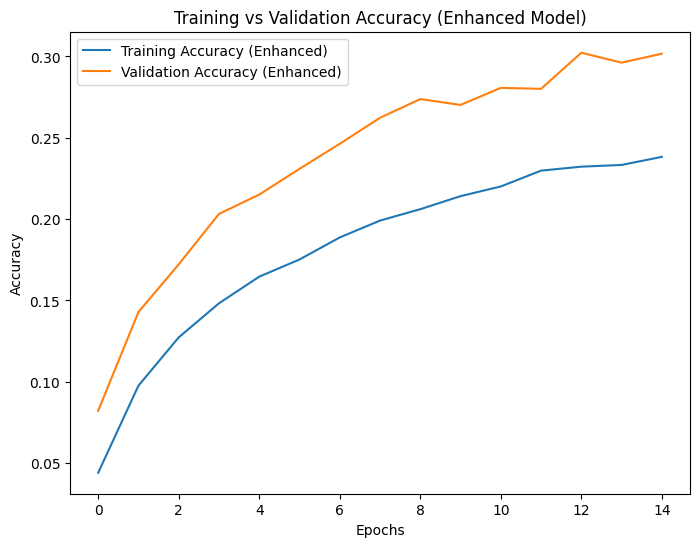

In [19]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_enhanced.history['accuracy'], label='Training Accuracy (Enhanced)')
plt.plot(history_enhanced.history['val_accuracy'], label='Validation Accuracy (Enhanced)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Enhanced Model)')
plt.legend()
plt.show()


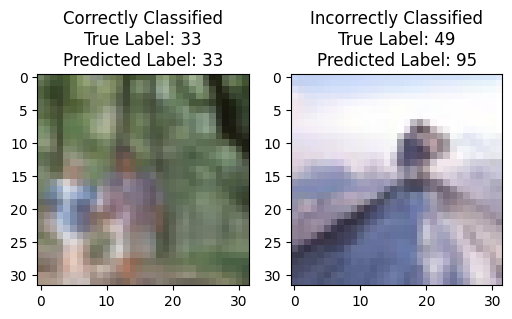


Correctly Classified - Prediction Probabilities:
Class 0: 0.0000
Class 1: 0.0008
Class 2: 0.0006
Class 3: 0.0014
Class 4: 0.0037
Class 5: 0.0007
Class 6: 0.0002
Class 7: 0.0002
Class 8: 0.0234
Class 9: 0.0004
Class 10: 0.0005
Class 11: 0.0005
Class 12: 0.0046
Class 13: 0.0003
Class 14: 0.0002
Class 15: 0.0011
Class 16: 0.0001
Class 17: 0.0003
Class 18: 0.0037
Class 19: 0.0020
Class 20: 0.0000
Class 21: 0.0008
Class 22: 0.0006
Class 23: 0.0001
Class 24: 0.0000
Class 25: 0.0013
Class 26: 0.0008
Class 27: 0.0199
Class 28: 0.0007
Class 29: 0.0069
Class 30: 0.0008
Class 31: 0.0050
Class 32: 0.0035
Class 33: 0.2784
Class 34: 0.0061
Class 35: 0.0008
Class 36: 0.0005
Class 37: 0.0037
Class 38: 0.0095
Class 39: 0.0057
Class 40: 0.0003
Class 41: 0.0003
Class 42: 0.0589
Class 43: 0.0007
Class 44: 0.0070
Class 45: 0.0053
Class 46: 0.0007
Class 47: 0.0097
Class 48: 0.0003
Class 49: 0.0001
Class 50: 0.0068
Class 51: 0.0055
Class 52: 0.0023
Class 53: 0.0000
Class 54: 0.0001
Class 55: 0.0060
Class 56

In [20]:
# Find indices of correctly and incorrectly classified test images
correct_idx_enhanced = np.where(y_pred_classes_enhanced == y_true_classes)[0][0]
incorrect_idx_enhanced = np.where(y_pred_classes_enhanced != y_true_classes)[0][0]

# Plot the images
plt.figure(figsize=(6, 3))
# Correctly classified image
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx_enhanced])
plt.title(f"Correctly Classified\nTrue Label: {y_true_classes[correct_idx_enhanced]}\nPredicted Label: {y_pred_classes_enhanced[correct_idx_enhanced]}")

# Incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx_enhanced])
plt.title(f"Incorrectly Classified\nTrue Label: {y_true_classes[incorrect_idx_enhanced]}\nPredicted Label: {y_pred_classes_enhanced[incorrect_idx_enhanced]}")
plt.show()

# Correctly classified image probabilities
correct_probs_enhanced = y_pred_enhanced[correct_idx_enhanced]
print("\nCorrectly Classified - Prediction Probabilities:")
for i, prob in enumerate(correct_probs_enhanced):
    print(f"Class {i}: {prob:.4f}")

# Incorrectly classified image probabilities
incorrect_probs_enhanced = y_pred_enhanced[incorrect_idx_enhanced]
print("\nIncorrectly Classified - Prediction Probabilities:")
for i, prob in enumerate(incorrect_probs_enhanced):
    print(f"Class {i}: {prob:.4f}")


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
The model’s performance decreased, with accuracy and F1-score dropping to around 28%, compared to the baseline’s 33.56% accuracy and 33.39% F1-score. This decline is likely due to excessive regularization (e.g., too much dropout) and overly aggressive data augmentation. While regularization and augmentation are intended to prevent overfitting, they can lead to underfitting, as seen in the low training and validation accuracy. Data augmentation might have distorted critical features in the small CIFAR-100 images (32x32 pixels), making it harder for the model to learn meaningful patterns.

There is room for improvement. Refining augmentation techniques, such as using subtle transformations (e.g., minor shifts or flips), could help preserve image details. Reducing dropout rates or selectively applying them to specific layers may improve the model's learning capacity. Tuning hyperparameters like the learning rate and increasing the number of filters in convolutional layers could also enhance performance.

In the future, I would explore pretrained models like ResNet or VGG, which leverage prior knowledge and are well-suited for complex datasets. Fine-tuning these models or using transfer learning could improve feature extraction and overall performance on CIFAR-100.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.